🔍 Performing Customer Analytics...


Saving SampleSuperstore.csv to SampleSuperstore.csv
Dataset Overview:
Shape: (9994, 21)

First 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164



📊 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null  

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,11,5563.560
AA-10375,19,15,1056.390
AA-10480,259,12,1790.512
AA-10645,55,18,5086.935
AB-10015,415,6,886.156



📈 Performing Sales Trend Analysis...


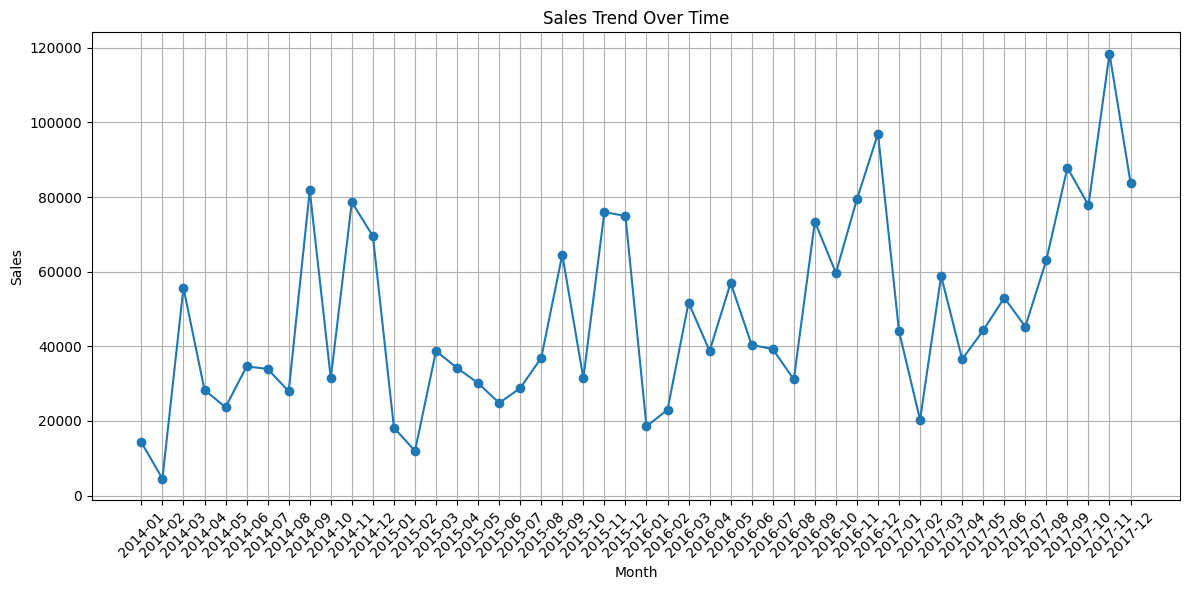


📢 Performing Marketing Analytics...
Category Performance:


,Category,Sales,Profit,Quantity
0,Furniture,741999.7953,18451.2728,8028
1,Office Supplies,719047.0320,122490.8008,22906
2,Technology,836154.0330,145454.9481,6939



💾 Saving insights to Excel...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Customer Analytics Complete! Excel file downloaded.


In [1]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn openpyxl

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files, drive


print(" Performing Customer Analytics...")

# Upload data file
uploaded = files.upload()

# Load data
import io
df = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']), encoding='latin-1')

# Display basic info
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\n Basic Information:")
df.info()

# 1. Customer Analytics: RFM Analysis
print("\n Performing RFM Analysis...")
df['Order Date'] = pd.to_datetime(df['Order Date'])
max_date = df['Order Date'].max()

rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (max_date - x.max()).days,  # Recency
    'Order ID': 'count',                                # Frequency
    'Sales': 'sum'                                      # Monetary
}).rename(columns={'Order Date': 'Recency', 'Order ID': 'Frequency', 'Sales': 'Monetary'})

print("RFM Analysis Results:")
display(rfm.head())

# 2. Trend Analysis (Sales over time)
print("\n Performing Sales Trend Analysis...")
df['YearMonth'] = df['Order Date'].dt.to_period('M')
sales_trends = df.groupby('YearMonth').agg({'Sales': 'sum'}).reset_index()
sales_trends['YearMonth'] = sales_trends['YearMonth'].astype(str)

# Plot sales trends
plt.figure(figsize=(12, 6))
plt.plot(sales_trends['YearMonth'], sales_trends['Sales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Marketing Analytics: Analyze by Segment/Category
print("\n Performing Marketing Analytics...")
category_analysis = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

print("Category Performance:")
display(category_analysis)

# Visualize category performance
fig = px.bar(category_analysis, x='Category', y='Sales', title='Sales by Category')
fig.show()

# 4. Save insights to Excel (Covers "Excel" keyword)
print("\n Saving insights to Excel...")
with pd.ExcelWriter('customer_analytics_report.xlsx', engine='openpyxl') as writer:
    rfm.to_excel(writer, sheet_name='RFM Analysis')
    sales_trends.to_excel(writer, sheet_name='Sales Trends')
    category_analysis.to_excel(writer, sheet_name='Category Performance')

# Download the Excel file
files.download('customer_analytics_report.xlsx')

print(" Customer Analytics Complete! Excel file downloaded.")